In [1]:
# Import necessary libraries
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import scipy.stats as stats  # For statistical analysis

# These libraries will help with data manipulation, visualization, and statistical analysis.

In [2]:
# Load the diabetes dataset from the specified file path
# Ensure the file exists at the given location before running the code
df = pd.read_csv('C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/diabetes.csv')

# Now, 'df' contains the diabetes dataset, which can be analyzed further.
# To check the first few rows of the dataset, you can run:
print(df.head())  # Displays the first five rows to get an overview of the data structure

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Glucose

In [3]:
# Extract the 'Glucose' column from the dataset
Glucose_series = df['Glucose']

# Perform the Shapiro-Wilk normality test
# This test checks if the 'Glucose' data follows a normal distribution
shapiro_test = stats.shapiro(Glucose_series)

# Print the test statistic's p-value
# The p-value helps determine whether the data follows a normal distribution
print("Test statistic (W):", shapiro_test.pvalue)

# Interpretation:
# - If p-value > 0.05: Fail to reject the null hypothesis, data is likely normally distributed
# - If p-value ≤ 0.05: Reject the null hypothesis, data is likely not normally distributed
if shapiro_test.pvalue > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

Test statistic (W): 1.9863474999979633e-11
Data is not normally distributed


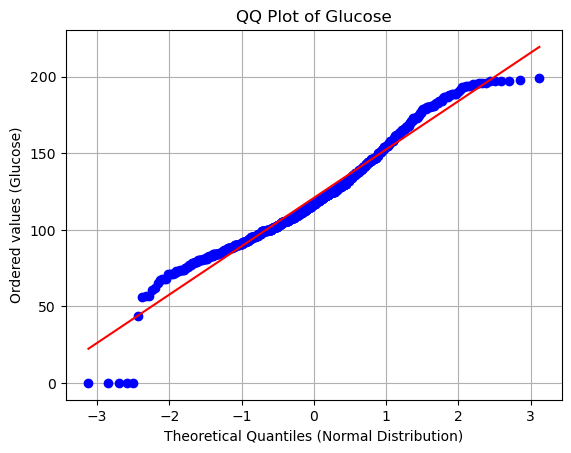

In [4]:
# Generate a QQ Plot to visually assess whether 'Glucose' follows a normal distribution
# QQ Plot compares the quantiles of our dataset with a theoretical normal distribution

stats.probplot(Glucose_series, dist="norm", plot=plt)  # Creates the QQ plot

# Add a title to the plot
plt.title('QQ Plot of Glucose')

# Label the x-axis to indicate theoretical quantiles from a normal distribution
plt.xlabel('Theoretical Quantiles (Normal Distribution)')

# Label the y-axis to show the actual ordered values from the dataset
plt.ylabel('Ordered values (Glucose)')

# Enable grid for better readability
plt.grid(True)

# Display the plot
plt.show()

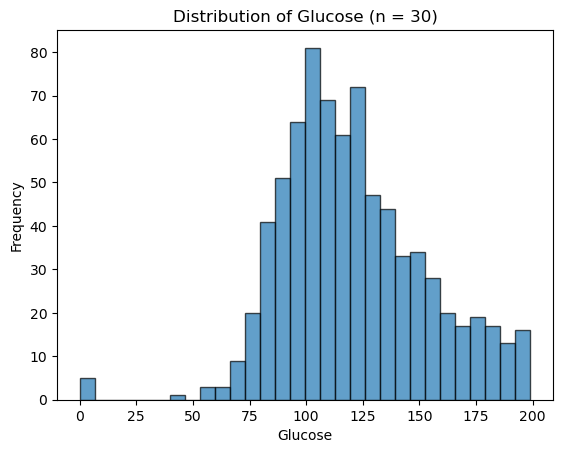

In [5]:
# Plot the histogram to visualize the distribution of glucose levels
# This helps understand how glucose values are distributed across the dataset

plt.hist(Glucose_series, bins=30, edgecolor='k', alpha=0.7)  # Create histogram
# - bins=30: Divides the data into 30 intervals
# - edgecolor='k': Adds black edges to the bins for better visibility
# - alpha=0.7: Sets transparency to make overlapping bars easier to see

# Add title to describe the plot
plt.title("Distribution of Glucose (n = 30)")

# Label the x-axis to indicate glucose levels
plt.xlabel("Glucose")

# Label the y-axis to show frequency (count of occurrences in each bin)
plt.ylabel("Frequency")

# Display the histogram
plt.show()

# Sample Mean

In [6]:
# Central Limit Theorem (CLT) demonstration
# The CLT states that the distribution of sample means will approximate a normal distribution,
# regardless of the population's distribution, as long as the sample size is sufficiently large.

# Initialize an empty list to store sample means
sample_means = []

# Define the number of samples to draw
n_samples = 100  # Number of random samples to generate

# Define the sample size for each sample
sample_size = 30  # Each sample consists of 30 observations

In [7]:
# Generate sample means using the Central Limit Theorem (CLT)
# - We randomly select 'sample_size' values from the 'Glucose' column for each sample
# - We repeat this process 'n_samples' times to build a distribution of sample means

for _ in range(n_samples):  # Loop to generate multiple samples
    sample = df['Glucose'].sample(n=sample_size, replace=True)  # Randomly select 'sample_size' values (with replacement)
    sample_means.append(sample.mean())  # Compute the mean of each sample and store it

# Now, 'sample_means' contains the means of 100 random samples of size 30 each.
# This collection should approximate a normal distribution, even if the original data isn't normally distributed.

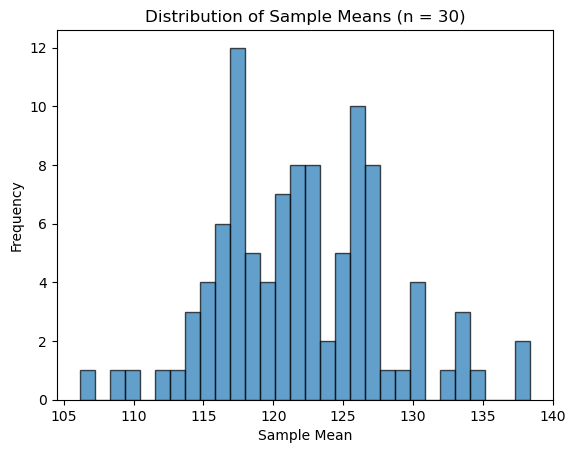

In [8]:
# Plot the histogram to visualize the distribution of sample means
# According to the Central Limit Theorem, the sample means should form a normal distribution

plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)  # Create histogram
# - bins=30: Divides the data into 30 intervals
# - edgecolor='k': Adds black edges to the bins for better visibility
# - alpha=0.7: Sets transparency to make overlapping bars easier to see

# Add a title to describe the plot
plt.title("Distribution of Sample Means (n = 30)")

# Label the x-axis to indicate the sample mean values
plt.xlabel("Sample Mean")

# Label the y-axis to show frequency (count of occurrences in each bin)
plt.ylabel("Frequency")

# Display the histogram
plt.show()

In [9]:
# Display summary information about the diabetes dataset
# This provides details on column names, data types, and missing values
df.info()

# Display the first few sample means to check the distribution
print(sample_means[:10])  # Shows the first 10 sample mean values for inspection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
[122.16666666666667, 120.4, 123.86666666666666, 121.73333333333333, 126.73333333333333, 133.56666666666666, 106.13333333333334, 126.13333333333334, 116.86666666666666, 124.66666666666667]


In [10]:
# Perform the Shapiro-Wilk normality test on sample means
# Since the Central Limit Theorem suggests sample means should follow a normal distribution,
# this test will help verify whether that holds for our generated samples.

shapiro_test = stats.shapiro(sample_means)

# Print the test statistic's p-value
# The p-value helps determine whether the data follows a normal distribution
print("Test statistic (W):", shapiro_test.pvalue)

# Interpretation:
# - If p-value > 0.05: Fail to reject the null hypothesis, data is likely normally distributed
# - If p-value ≤ 0.05: Reject the null hypothesis, data is likely not normally distributed
if shapiro_test.pvalue > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

Test statistic (W): 0.42815110008717727
Data is normally distributed


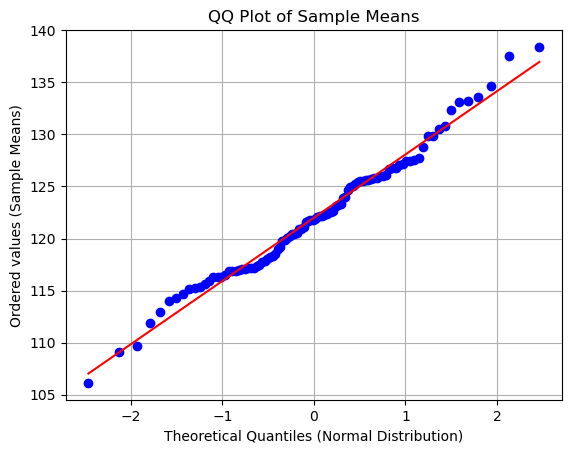

In [11]:
# Generate a QQ Plot to visually assess whether the sample means follow a normal distribution
# According to the Central Limit Theorem, sample means should approximate a normal distribution

stats.probplot(sample_means, dist="norm", plot=plt)  # Creates the QQ plot

# Add a title to describe the plot
plt.title('QQ Plot of Sample Means')

# Label the x-axis to indicate theoretical quantiles from a normal distribution
plt.xlabel('Theoretical Quantiles (Normal Distribution)')

# Label the y-axis to show the actual ordered sample means from the dataset
plt.ylabel('Ordered values (Sample Means)')

# Enable grid for better readability
plt.grid(True)

# Display the QQ plot
plt.show()